<a href="https://colab.research.google.com/github/ogadepoju/MachineLearning/blob/master/PCOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#We Import all the required libraries
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import xgboost as xgb
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

warnings.filterwarnings('ignore')

In [ ]:
# We imported files from google.colab to allow us upload the dataset
from google.colab import files


uploaded = files.upload()

Saving PCOS_data.csv to PCOS_data.csv


In [ ]:
# We read the dataset file using pandas
df = pd.read_csv(io.BytesIO(uploaded['PCOS_data.csv']))

In [ ]:
#We get the number of row and column using df.shape
df.shape

(541, 45)

In [ ]:
# Gives more information about the dataset like all the columns, the total number of non-null and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
# At this point we checking for null values
df.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of abortions            0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  1
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [ ]:
PCOS =df.corrwith(df["PCOS (Y/N)"]).abs().sort_values(ascending=False)
PCOS

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.377933
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.263863
Weight (Kg)               0.211938
BMI                       0.199697
Cycle length(days)        0.178480
Hair loss(Y/N)            0.172879
 Age (yrs)                0.168513
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Marraige Status (Yrs)     0.112897
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.    

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(PCOS, annot=True, fmt="g")
plt.show()

IndexError: Inconsistent shape between the condition and the input (got (44, 1) and (44,))

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# We drop features that is not needed for our prediction
data = df.drop(['Sl. No', 'Patient File No.', 'Avg. F size (R) (mm)',  'Hb(g/dl)', 'Vit D3 (ng/mL)', 'Reg.Exercise(Y/N)', 'LH(mIU/mL)',  'No. of abortions', 'RBS(mg/dl)', 'PRG(ng/mL)', 'BP _Diastolic (mmHg)', 'RR (breaths/min)', 'Blood Group', 'FSH(mIU/mL)', '  I   beta-HCG(mIU/mL)', 'Pregnant(Y/N)', 'FSH/LH', 'II    beta-HCG(mIU/mL)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'BP _Systolic (mmHg)', 'Height(Cm) ','Pulse rate(bpm) ', 'PRL(ng/mL)'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1    Age (yrs)             541 non-null    int64  
 2   Weight (Kg)            541 non-null    float64
 3   BMI                    541 non-null    float64
 4   Cycle(R/I)             541 non-null    int64  
 5   Cycle length(days)     541 non-null    int64  
 6   Marraige Status (Yrs)  540 non-null    float64
 7   Hip(inch)              541 non-null    int64  
 8   Waist(inch)            541 non-null    int64  
 9   AMH(ng/mL)             540 non-null    float64
 10  Weight gain(Y/N)       541 non-null    int64  
 11  hair growth(Y/N)       541 non-null    int64  
 12  Skin darkening (Y/N)   541 non-null    int64  
 13  Hair loss(Y/N)         541 non-null    int64  
 14  Pimples(Y/N)           541 non-null    int64  
 15  Fast f

In [ ]:
dataset = data.drop(['Unnamed: 44' ], axis=1)

In [ ]:
dataset['PCOS (Y/N)'].value_counts()

0    364
1    177
Name: PCOS (Y/N), dtype: int64

In [ ]:
dataset.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),BMI,Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Hip(inch),Waist(inch),AMH(ng/mL),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Endometrium (mm)
0,0,28,44.6,19.3,2,5,7.0,36,30,2.07,0,0,0,0,0,1.0,3,3,18.0,8.5
1,0,36,65.0,24.9,2,5,11.0,38,32,1.53,0,0,0,0,0,0.0,3,5,15.0,3.7
2,1,33,68.8,25.3,2,5,10.0,40,36,6.63,0,0,0,1,1,1.0,13,15,18.0,10.0
3,0,37,65.0,29.7,2,5,4.0,42,36,1.22,0,0,0,0,0,0.0,2,2,15.0,7.5
4,0,25,52.0,20.1,2,5,1.0,37,30,2.26,0,0,0,1,0,0.0,3,4,16.0,7.0


In [ ]:
dataset.shape

(541, 20)

In [ ]:
print( dataset.columns)

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'BMI', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'Hip(inch)',
       'Waist(inch)', 'AMH(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Endometrium (mm)'],
      dtype='object')


In [ ]:
# We fill the features with null values with the mean
dataset['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].mean(),inplace=True)
dataset['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].mean(),inplace=True)
dataset['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].mean(),inplace=True)

In [ ]:
dataset.isnull().sum()

PCOS (Y/N)               0
 Age (yrs)               0
Weight (Kg)              0
BMI                      0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    0
Hip(inch)                0
Waist(inch)              0
AMH(ng/mL)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          0
Follicle No. (L)         0
Follicle No. (R)         0
Avg. F size (L) (mm)     0
Endometrium (mm)         0
dtype: int64

In [ ]:
dataset.dtypes

PCOS (Y/N)                 int64
 Age (yrs)                 int64
Weight (Kg)              float64
BMI                      float64
Cycle(R/I)                 int64
Cycle length(days)         int64
Marraige Status (Yrs)    float64
Hip(inch)                  int64
Waist(inch)                int64
AMH(ng/mL)               float64
Weight gain(Y/N)           int64
hair growth(Y/N)           int64
Skin darkening (Y/N)       int64
Hair loss(Y/N)             int64
Pimples(Y/N)               int64
Fast food (Y/N)          float64
Follicle No. (L)           int64
Follicle No. (R)           int64
Avg. F size (L) (mm)     float64
Endometrium (mm)         float64
dtype: object

In [ ]:
#dataset['II    beta-HCG(mIU/mL)'].head()

In [ ]:

dataset["AMH(ng/mL)"] = pd.to_numeric(dataset["AMH(ng/mL)"], errors='coerce')
#dataset["II    beta-HCG(mIU/mL)"] = pd.to_numeric(dataset["II    beta-HCG(mIU/mL)"], errors='coerce')

In [ ]:
dataset.dtypes

PCOS (Y/N)                 int64
 Age (yrs)                 int64
Weight (Kg)              float64
BMI                      float64
Cycle(R/I)                 int64
Cycle length(days)         int64
Marraige Status (Yrs)    float64
Hip(inch)                  int64
Waist(inch)                int64
AMH(ng/mL)               float64
Weight gain(Y/N)           int64
hair growth(Y/N)           int64
Skin darkening (Y/N)       int64
Hair loss(Y/N)             int64
Pimples(Y/N)               int64
Fast food (Y/N)          float64
Follicle No. (L)           int64
Follicle No. (R)           int64
Avg. F size (L) (mm)     float64
Endometrium (mm)         float64
dtype: object

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PCOS (Y/N),541.0,0.327172,0.469615,0.0,0.00,0.0,1.0,1.0
Age (yrs),541.0,31.430684,5.411006,20.0,28.00,31.0,35.0,48.0
Weight (Kg),541.0,59.637153,11.028287,31.0,52.00,59.0,65.0,108.0
BMI,541.0,24.307579,4.055129,12.4,21.60,24.2,26.6,38.9
Cycle(R/I),541.0,2.560074,0.901950,2.0,2.00,2.0,4.0,5.0
Cycle length(days),541.0,4.940850,1.492020,0.0,4.00,5.0,5.0,12.0
Marraige Status (Yrs),541.0,7.680926,4.799385,0.0,4.00,7.0,10.0,30.0
Hip(inch),541.0,37.992606,3.967920,26.0,36.00,38.0,40.0,48.0
Waist(inch),541.0,33.841035,3.596894,24.0,32.00,34.0,36.0,47.0
AMH(ng/mL),541.0,5.624191,5.876160,0.1,2.01,3.7,6.9,66.0


In [ ]:
PCOS_data = data.groupby("PCOS (Y/N)").mean().round(2).T
PCOS_data

PCOS (Y/N),0,1
Age (yrs),32.07,30.12
Weight (Kg),58.01,62.99
BMI,23.74,25.47
Cycle(R/I),2.31,3.08
Cycle length(days),5.13,4.56
Marraige Status (Yrs),8.06,6.90
Hip(inch),37.54,38.92
Waist(inch),33.43,34.69
AMH(ng/mL),4.54,7.84
Weight gain(Y/N),0.23,0.68


In [ ]:
import seaborn as sns

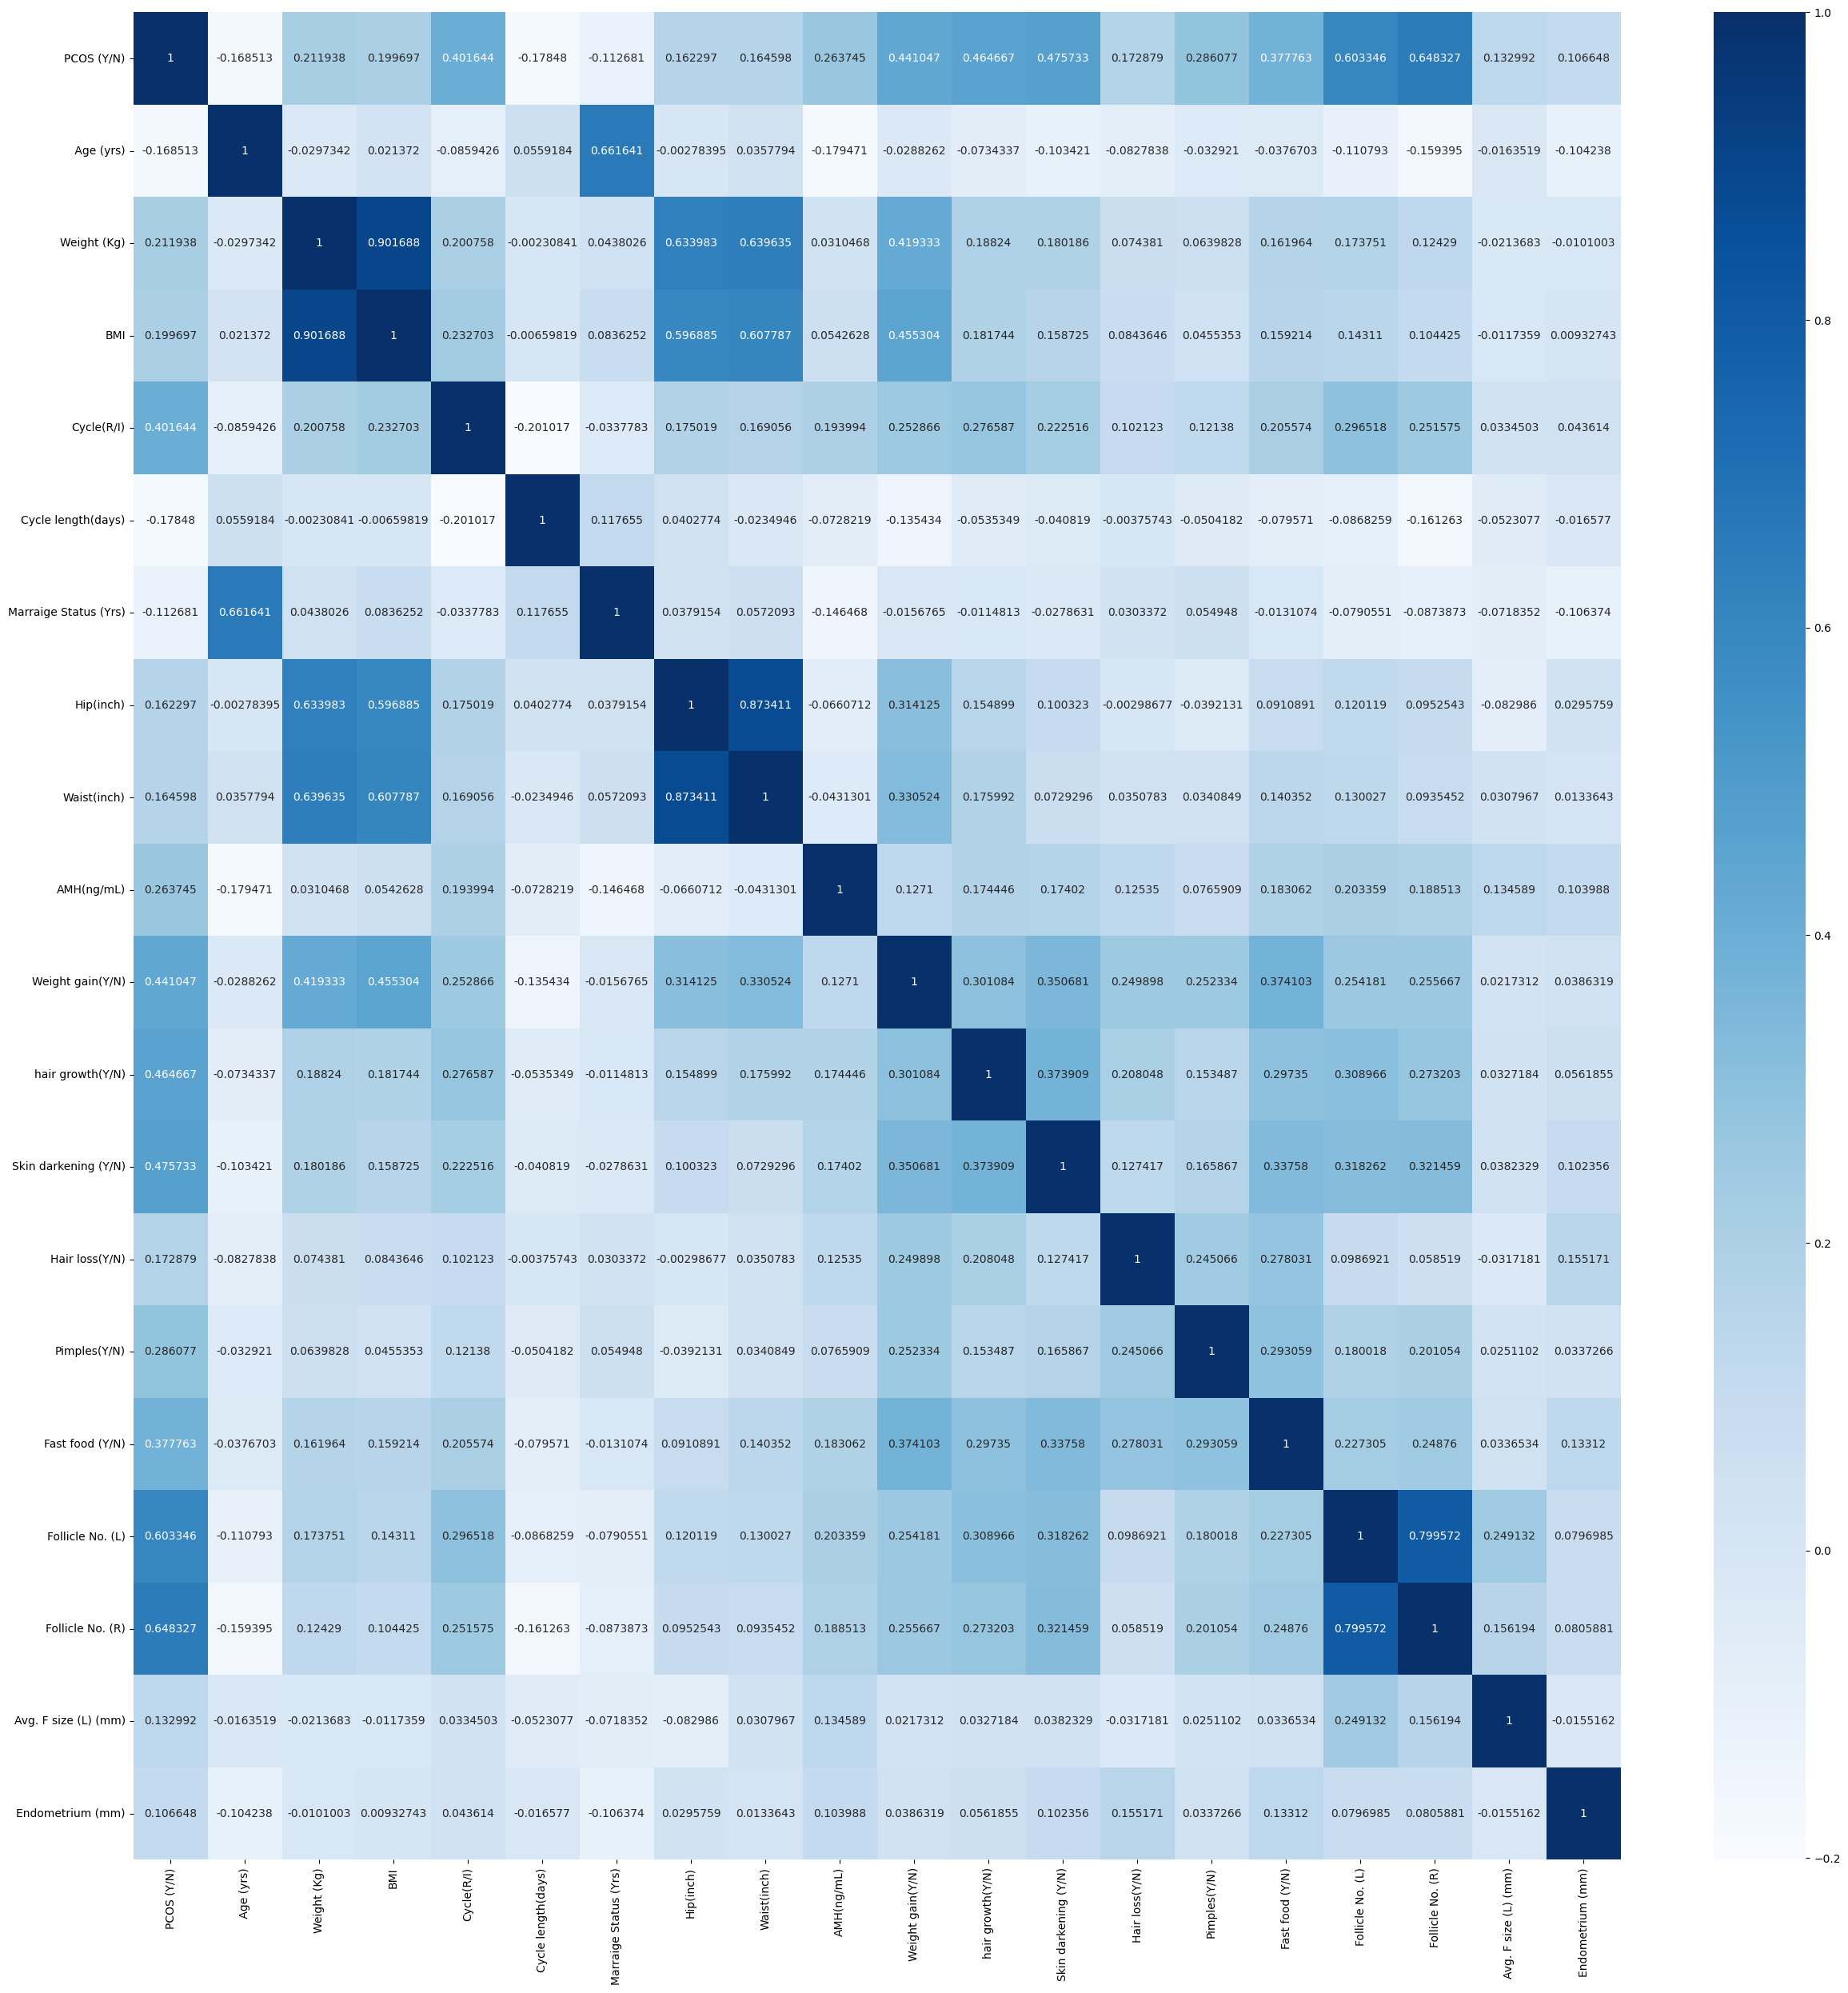

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(dataset.corr(), annot=True, fmt="g", cmap='Blues')
plt.show()

In [ ]:
PCOS =dataset.corrwith(dataset["PCOS (Y/N)"]).abs().sort_values(ascending=False)

In [ ]:
PCOS

PCOS (Y/N)               1.000000
Follicle No. (R)         0.648327
Follicle No. (L)         0.603346
Skin darkening (Y/N)     0.475733
hair growth(Y/N)         0.464667
Weight gain(Y/N)         0.441047
Cycle(R/I)               0.401644
Fast food (Y/N)          0.377763
Pimples(Y/N)             0.286077
AMH(ng/mL)               0.263745
Weight (Kg)              0.211938
BMI                      0.199697
Cycle length(days)       0.178480
Hair loss(Y/N)           0.172879
 Age (yrs)               0.168513
Waist(inch)              0.164598
Hip(inch)                0.162297
Avg. F size (L) (mm)     0.132992
Marraige Status (Yrs)    0.112681
Endometrium (mm)         0.106648
dtype: float64

In [ ]:
#Dividing the dataset into feature and target data
y = dataset["PCOS (Y/N)"]

In [ ]:
X = dataset.drop("PCOS (Y/N)", axis = 1)

In [ ]:
# Let instantiate the RandomUnderSampler
random_oversampler = RandomOverSampler(sampling_strategy='auto', random_state=1)

# Resample the dataset
X_resampled_over, y_resampled_over = random_oversampler.fit_resample(X, y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled_over,y_resampled_over, train_size = 0.70,random_state = 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

In [ ]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [ ]:
# metrics are used to find accuracy or error
from sklearn import metrics
print()

After splitting, balance the class and record the technique used, please.
Model Selection: XGB, Adaboost,Gradient boosting, Random Forest and Logistic regression.
Let's use a 75: 25 split.

In [ ]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9497716894977168


In [ ]:
ypred = clf.predict(X_test)
ypred

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [ ]:
print (classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       120
           1       0.92      0.98      0.95        99

    accuracy                           0.95       219
   macro avg       0.95      0.95      0.95       219
weighted avg       0.95      0.95      0.95       219



In [ ]:
cm = confusion_matrix(y_test,ypred, labels=clf.classes_)

In [ ]:
cm

array([[111,   9],
       [  2,  97]])

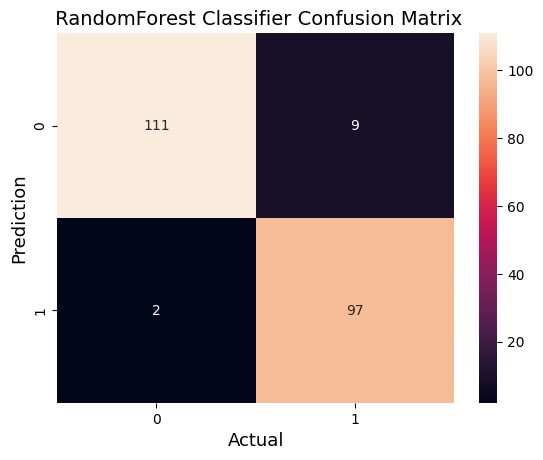

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g',
            xticklabels=clf.classes_,
            yticklabels=clf.classes_,)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title(' RandomForest Classifier Confusion Matrix',fontsize=14)
plt.show()

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled_over,y_resampled_over, test_size=0.3, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)

LogisticRegression()

In [ ]:
y_pred1 = logreg.predict(X_test)

In [ ]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test1, y_pred1))

ACCURACY OF THE MODEL:  0.8995433789954338


In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       120
           1       0.87      0.92      0.89        99

    accuracy                           0.90       219
   macro avg       0.90      0.90      0.90       219
weighted avg       0.90      0.90      0.90       219



In [ ]:
cm1 = confusion_matrix(y_test1,y_pred1,labels=logreg.classes_)

In [ ]:
cm1

array([[106,  14],
       [  8,  91]])

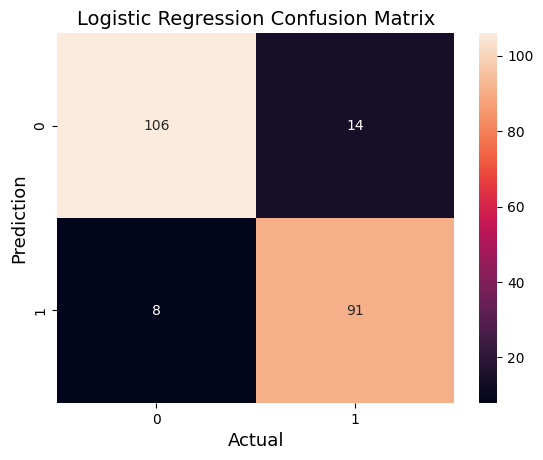

In [ ]:
sns.heatmap(cm1, annot=True, fmt='g',
            xticklabels=logreg.classes_,
            yticklabels=logreg.classes_,)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Logistic Regression Confusion Matrix',fontsize=14)
plt.show()

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_resampled_over,y_resampled_over, test_size=0.3, random_state=65)


In [ ]:
model = xgb.XGBClassifier()

In [ ]:
model.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
predicted_y = model.predict(x_test2)

In [ ]:
print(metrics.classification_report(y_test2, predicted_y))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       105
           1       0.91      0.96      0.93       114

    accuracy                           0.93       219
   macro avg       0.93      0.93      0.93       219
weighted avg       0.93      0.93      0.93       219



In [ ]:
cm2 = confusion_matrix(y_test2,predicted_y, labels=model.classes_)

In [ ]:
cm2

array([[ 94,  11],
       [  5, 109]])

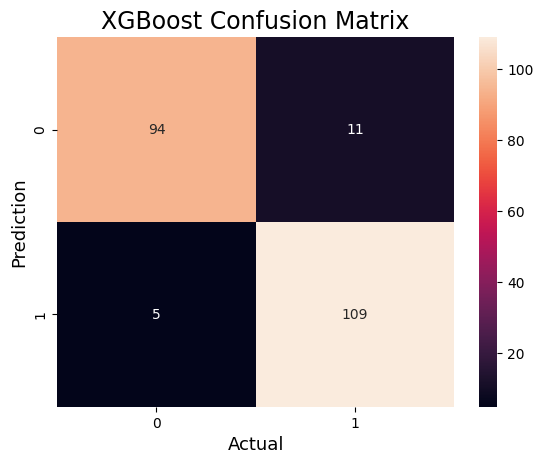

In [ ]:
sns.heatmap(cm2, annot=True, fmt='g',
            xticklabels=model.classes_,
            yticklabels=model.classes_,)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('XGBoost Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X_resampled_over,y_resampled_over, test_size=0.3, random_state=1)

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

In [ ]:
gradient_booster.fit(x_train3,y_train3)

GradientBoostingClassifier()

In [ ]:
gra_pred = gradient_booster.predict(x_test3)

In [ ]:
print(classification_report(y_test3,gra_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       120
           1       0.89      0.92      0.91        99

    accuracy                           0.91       219
   macro avg       0.91      0.91      0.91       219
weighted avg       0.91      0.91      0.91       219



In [ ]:
cm3 = confusion_matrix(y_test3,gra_pred, labels=gradient_booster.classes_)

In [ ]:
cm3

array([[109,  11],
       [  8,  91]])

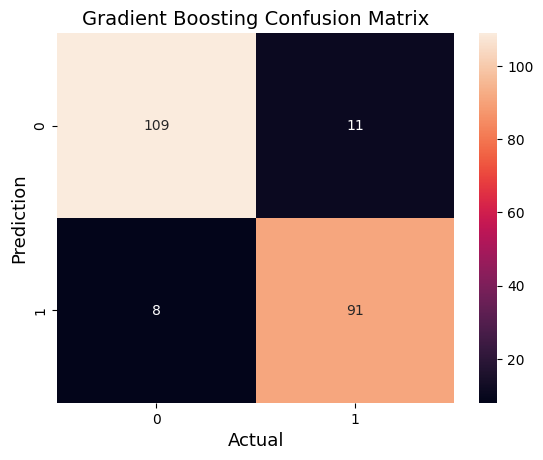

In [ ]:
sns.heatmap(cm3, annot=True,  fmt='g',
            xticklabels=gradient_booster.classes_,
            yticklabels=gradient_booster.classes_,)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Gradient Boosting Confusion Matrix',fontsize=14)
plt.show()

In [ ]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(X_resampled_over,y_resampled_over, test_size=0.3, random_state=1)

In [ ]:
# Creating adaboost classifier model
adb = AdaBoostClassifier()
adb_model = adb.fit(x_train4,y_train4)

In [ ]:
adb_pred = adb.predict(x_test4)

In [ ]:
print("The accuracy of the model on validation set is", metrics.accuracy_score(y_test4, adb_pred))

The accuracy of the model on validation set is 0.863013698630137


In [ ]:
print(classification_report(y_test4,adb_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       120
           1       0.83      0.87      0.85        99

    accuracy                           0.86       219
   macro avg       0.86      0.86      0.86       219
weighted avg       0.86      0.86      0.86       219



In [ ]:
cm4 = confusion_matrix(y_test4,adb_pred, labels=adb.classes_)

In [ ]:
cm4

array([[103,  17],
       [ 13,  86]])

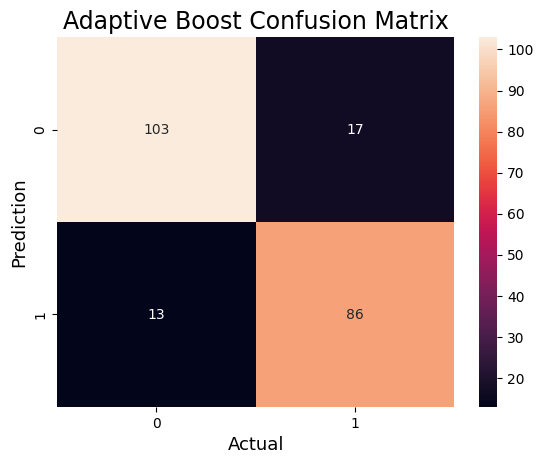

In [ ]:
sns.heatmap(cm4, annot=True, fmt='g',
            xticklabels=clf.classes_,
            yticklabels=clf.classes_,)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Adaptive Boost Confusion Matrix',fontsize=17)
plt.show()
